In [1]:
import numpy as np

from tools.semantic_kitti_api.auxiliary.laserscan import *
import yaml
import matplotlib.pyplot as plt
from mayavi import mlab
from tools.ground_removal import *

CFG = yaml.safe_load(open("tools/semantic_kitti_api/config/semantic-kitti.yaml", 'r'))
path = "semantic_kitti_data"
color_dict = CFG["color_map"]
nclasses = len(color_dict)
scan = SemLaserScan(nclasses, color_dict, project=True)
data = np.fromfile('../../semantic_kitti_data/sequences/01/velodyne/000005.bin',dtype=np.float32)
data = data.reshape((-1,4))

mask = get_frame_without_ground_mask(5)
xyz = data[:,0:3][mask]
intens = data[:,3]
scan.set_points(xyz, intens) # TODO add remision - intensities


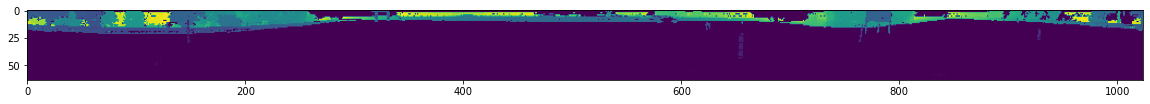

In [2]:
plt.figure(figsize=(20,20))
range_image = scan.proj_range
plt.imshow(range_image)
plt.show()

Taking first few rows

In [5]:
pts = scan.proj_xyz[:,:,:].reshape(-1,3)
#pts = scan.proj_xyz.reshape(-1,3)
mlab.points3d(pts[:,0], pts[:,1], pts[:,2], mode='point')
mlab.show()

In [35]:
first_idx = 0
last_idx = 2
pts, intens = get_frame_without_ground(first_idx)
for i in range(first_idx + 1, last_idx):
    pts_, intens_ = get_frame_without_ground(i)
    pts = np.concatenate([pts, pts_])
    intens = np.concatenate([intens, intens_])


In [42]:
mlab.points3d(pts[:,0], pts[:,1], pts[:,2], intens, mode='point')
mlab.show()

AssertionError: argument shape are not equal

In [38]:
pts1 = get_frame_without_ground(0)[0]
pts2 = get_frame_without_ground(1)[0]
mlab.points3d(pts1[:,0], pts1[:,1], pts1[:,2], color=(1,0,0), mode='point')
mlab.points3d(pts2[:,0], pts2[:,1], pts2[:,2], color=(0,0,1), mode='point')

mlab.show()

In [37]:
pts.shape

(60324, 3)

In [47]:
import os
path_to_data = "../../semantic_kitti_data/sequences/01/velodyne/"
path_to_save = "../../semantic_kitti_data/sceneflow_data/"
CFG = yaml.safe_load(open("tools/semantic_kitti_api/config/semantic-kitti.yaml", 'r'))
files = os.listdir(path_to_data)
files.sort()


color_dict = CFG["color_map"]
nclasses = len(color_dict)
rows_start = 8
rows_end = rows_start + 8

for idx in range(len(files) - 1):
    file = files[idx]
    next_file = files[idx+1]
    # name = file.split('.')[0]
    name = str(idx)
    name_next = next_file.split('.')[0]
    if os.path.exists(path_to_save + name + ".npz"):
        print(f"file {name} already exists")
        continue

    scan1 = SemLaserScan(nclasses, color_dict, project=True)
    data1 = np.fromfile(path_to_data + file, dtype=np.float32)
    data1 = data1.reshape((-1,4))
    mask1 = get_frame_without_ground_mask(idx)
    xyz1 = data1[:,0:3][mask1]

    scan1.set_points(xyz1)
    # pts1 = scan1.proj_xyz[rows_start:rows_end,:,:].reshape(-1,3)
    pts1 = scan1.proj_xyz.reshape(-1,3)
    valid_rows = ~np.any(pts1 == np.array([-1.0, -1.0, -1.0]), axis=1)
    pts1 = pts1[valid_rows]


    scan2 = SemLaserScan(nclasses, color_dict, project=True)
    data2 = np.fromfile(path_to_data + next_file, dtype=np.float32)
    data2 = data2.reshape((-1,4))
    mask2 = get_frame_without_ground_mask(idx + 1)
    xyz2 = data2[:,0:3][mask2]


    scan2.set_points(xyz2)
    # pts2 = scan2.proj_xyz[rows_start:rows_end,:,:].reshape(-1,3)
    pts2 = scan2.proj_xyz.reshape(-1,3)
    valid_rows = ~np.any(pts2 == np.array([-1.0, -1.0, -1.0]), axis=1)
    pts2 = pts2[valid_rows]


    np.savez(path_to_save + name, pos1=pts1, pos2=pts2)
    print(f'created {name}')

created 0
created 1
created 2
created 3
created 4
created 5
created 6
created 7
created 8
created 9
created 10
created 11
created 12
created 13
created 14
created 15
created 16
created 17
created 18
created 19
created 20
created 21
created 22
created 23
created 24
created 25
created 26
created 27
created 28
created 29
created 30
created 31
created 32
created 33
created 34
created 35
created 36
created 37
created 38
created 39
created 40
created 41
created 42
created 43
created 44
created 45
created 46
created 47
created 48
created 49
created 50
created 51
created 52
created 53
created 54
created 55
created 56
created 57
created 58
created 59
created 60
created 61
created 62
created 63
created 64
created 65
created 66
created 67
created 68
created 69
created 70
created 71
created 72
created 73
created 74
created 75
created 76
created 77
created 78
created 79
created 80
created 81
created 82
created 83
created 84
created 85
created 86
created 87
created 88
created 89
created 90
created 9

In [56]:
a = np.load(path_to_save+"0.npz",allow_pickle=True)


In [57]:
valid_rows = ~np.all(a['pos2'] != np.array([-1.0, -1.0, -1.0]), axis=1)
valid_rows.sum()

0

In [59]:
pts = a['pos1']
mlab.points3d(pts[:,0], pts[:,1], pts[:,2], mode='point')
mlab.show()

In [50]:
path_to_save

'../../semantic_kitti_data/sceneflow_data/'